In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
original_image = cv2.imread("17.jpg")

In [3]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [4]:
vectorized = img.reshape((-1,3))

In [5]:
vectorized = np.float32(vectorized)

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [7]:
K = 4
attempts=20
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [8]:
center = np.uint8(center)

In [9]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

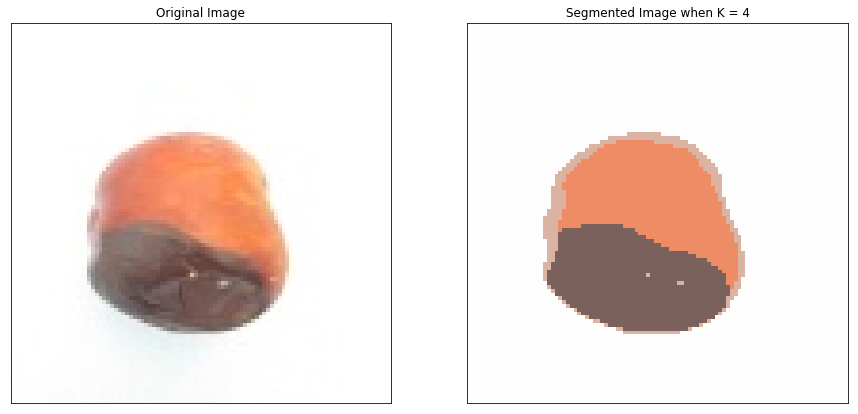

In [10]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

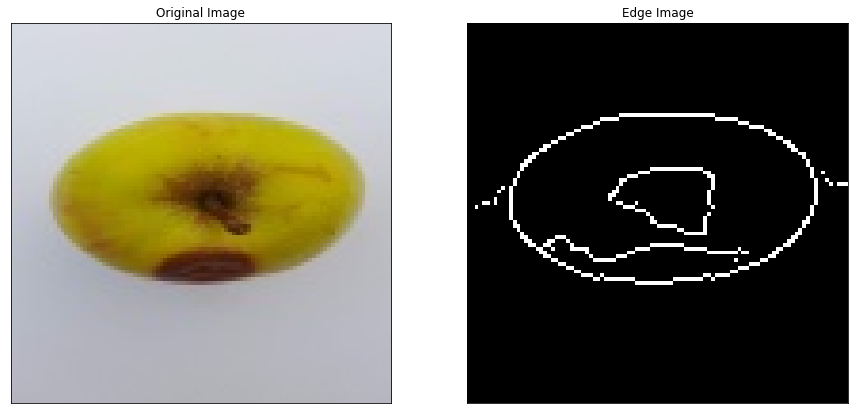

In [141]:
edges = cv2.Canny(result_image,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()